# Tutorial 25: Fourier analysis

## PHYS 5070, Spring 2022

In [10]:
## Common import cell!

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## T25.1 - Basics of discrete Fourier transforms

### Part A

Let's begin with an implementation of our own DFT algorithm.  Once again, from lecture the formulas for the (one-dimensional) DFT and inverse DFT are:

\\[
F_n = \frac{1}{\sqrt{2\pi}} \sum_{k=0}^{N-1} Z^{nk} f_k \\
f_k = \frac{\sqrt{2\pi}}{N} \sum_{n=0}^{N-1} Z^{-nk} F_n
\\]

where $Z = e^{-i\omega_N \Delta t} = e^{-2\pi i / N}$, $f_k = f(t_k)$ and $F_n = F(\omega_n)$.  This assumes our time-domain signal exists from $0$ to $T$ and consists of $N$ samples.  (Note that the sum index starts at 1, so you'll have to shift things slightly from the usual zero-indexing convention.)

__Implement the function `DFT()`__ in the cell below, which should take the t-array and the corresponding signal array and carry out either the Fourier transform (time to frequency) or the inverse, depending on the value of the `inverse` Boolean flag.

In [11]:
def DFT(t, signal, inverse=False):
    FT_signal = np.zeros_like(signal, complex)
    dt = t[1] - t[0]
    N = len(t)
    
    Z = np.exp(-2*np.pi * (0+1j) / N)
        
    ### BEGIN SOLUTION
    if (inverse):
        for k in range(N):
            Z_array = Z**(-k * np.arange(0, N))
            FT_signal[k] = np.sqrt(2*np.pi) / N * np.sum(Z_array * signal)
    else:
        for n in range(N):
            Z_array = Z**(n * np.arange(0,N))
            FT_signal[n] = 1/np.sqrt(2*np.pi) * np.sum(Z_array * signal)
    
    ### END SOLUTION
    return FT_signal
    

Now let's try it out on a simple signal where we know the answer to expect.  Here's a sum of two simple trig functions with frequencies 2 and 5:

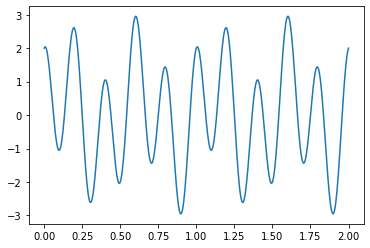

In [12]:
T = 2
N = 500
t = np.linspace(0, T, N)
signal = np.sin(2* np.pi * 2 *t) + 2*np.cos(2 * np.pi  * 5 *t)

plt.plot(t, signal)

In the cell below __use your DFT function__ to compute the discrete Fourier transform $F_n$.  This will be complex, but if you look at the __power spectrum__ $|F_n|^2$, you should see two sharp peaks at the exact input frequencies. (The frequencies will be at $f_n = n/T$, ranging from the lowest $1/T$ to the max $N/T$.)  The ratio of the amplitudes of the Fourier components should match the ratio of the input signal, that is, 4:1 in the power spectrum or 2:1 in just the absolute value $|F_n|$.

As noted in lecture, if you don't restrict your plotting range, you will see _mirror frequencies_ above the Nyquist frequency $N/(2T)$.  These extra amplitudes can be interpreted as _negative-frequency_ components of the signal, and are redundant for a real signal (Hermitian conjugates of the lower-frequency amplitudes.) There is some more discussion in [the NumPy documentation](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html).

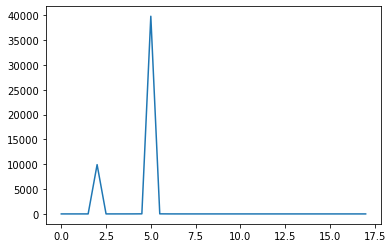

In [21]:
FT = DFT(t, signal)
pow_spec = np.abs(FT)**2
f = np.arange(0,N) / T
#plt.plot(f[:35], FT[:35])
plt.plot(f[:35], pow_spec[:35])

### Part B

The test you ran above is non-trivial, but just to make certain everything is working correctly, let's compare the DFT implementation to a module function.  __Recompute the Fourier transform__ of the given signal using `np.fft.fft()`, and once again plot the power spectrum - verify that you get the same answer as above.

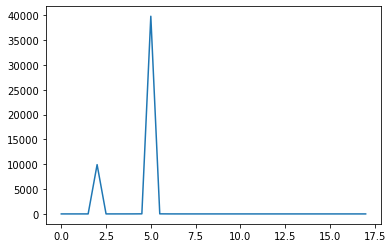

In [28]:
fast_FT = np.fft.fft(signal)
pow_spec_fast = np.abs(fast_FT)**2
f = np.arange(0,N) / T
#plt.plot(f, pow_spec_fast)
plt.plot(f[:35], pow_spec_fast[:35] /  (2 * np.pi))

Now, one final check: __apply the _inverse_ transform__ to the Fourier transform you obtained above and compare the resulting signal to the original time sequence.  This check is sort of trivial if you just compare to the original `(t, signal)` at the same sampling frequency, so you should plot the reconstruction against an _oversampled_ version of the signal (given to you below.)

If everything is correct, they should be identical (the Nyquist-Shannon theorem guarantees that with no signal frequencies above the Nyquist frequency, we can exactly reconstruct the input signal from the frequency-domain information.)

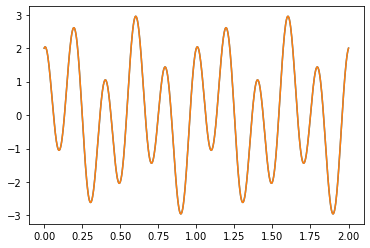

In [110]:
t_OS = np.linspace(0, T, 1000)
signal_OS = np.sin(4*np.pi*t_OS) + 2*np.cos(10*np.pi*t_OS)

### BEGIN SOLUTION
signal_rebuild = DFT(t, FT, inverse=True)

plt.plot(t, signal_rebuild.real)
plt.plot(t_OS, signal_OS)

### END SOLUTION

### Part C

Now let's look at aliasing.  Above the sampling frequency is $f_N = N/T = 500 / 2 = 250$.  Let's try to add a third component to our signal with a frequency below, but close to, 80:

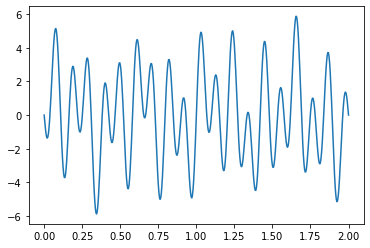

In [111]:
T = 2
t = np.linspace(0, T, 500)
signal = np.sin(4*np.pi*t) + 2*np.sin(10*np.pi*t) + 3 * np.sin(2 * np.pi * 240 * t)
plt.plot(t, signal)

Repeat the exercise of part A: compute the discrete Fourier transform and find the power spectrum.  You should now see a spurious, aliased contribution at a frequency of 10 due to the additional high-frequency signal component.

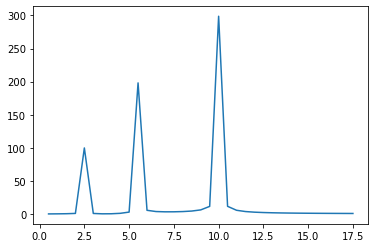

In [112]:
FT = DFT(t, signal)
pow_spec = np.abs(FT)
f = np.arange(1,501)/T
plt.plot(f[:35], pow_spec[:35])
#plt.plot(f, pow_spec)

Even with this extraneous effect, we can take the inverse FT and we'll still get back the original signal on the same set of sample points (assuming all our code is right).  Run the following cell and you should only see one curve:

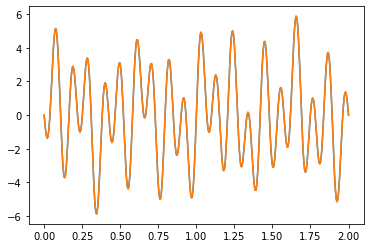

In [113]:
signal_rebuild = DFT(t, FT, inverse=True)

plt.plot(t, signal)
plt.plot(t, signal_rebuild.real)

However, as before this is trivial - what we really care about is how well our reconstructed signal matches the _real_ signal.  Repeat your part B exercise of _oversampling_ the signal with 1000 points, and plot them below to see the difference.

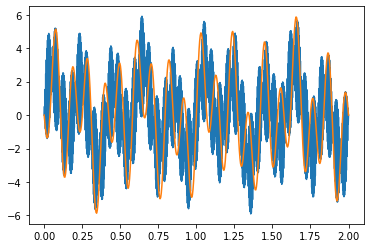

In [114]:
signal_rebuild = DFT(t, FT, inverse=True)

t_OS = np.linspace(0, T, 1000)
signal_OS = np.sin(4*np.pi*t_OS) + 2*np.sin(10*np.pi*t_OS) + 3 * np.sin(2 * np.pi * 240 * t_OS)

plt.plot(t_OS, signal_OS)
plt.plot(t, signal_rebuild.real)

### Part D

Finally, let's add some Gaussian noise on top of our signal.  Run the cell below to obtain a noisy version of the signal from part A.  (Note that I subtract off the mean of the noise at the end; this trivially removes the large zero-frequency component from the Fourier analysis.)

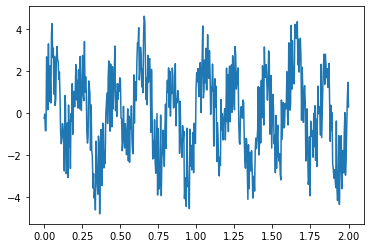

In [115]:
T = 2
t = np.linspace(0, T, 500)
noisy_signal = np.sin(4*np.pi*t) + 2*np.sin(10*np.pi*t)
noisy_signal += 4*np.random.rand(*noisy_signal.shape)
noisy_signal -= np.mean(noisy_signal)

plt.plot(t, noisy_signal)

Compute the power spectrum from the DFT below.  You should see more or less the same structure from part A, but with extra "power" apparent broadly over all frequencies - this is the effect of adding simple, uncorrelated noise at every sampling site.

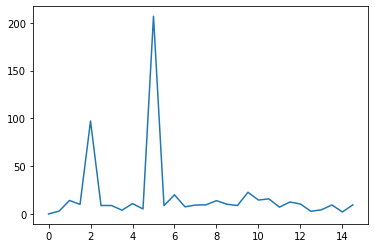

In [116]:
FT = DFT(t, noisy_signal)
pow_spec = np.abs(FT)
f = np.arange(0,500)/T

plt.plot(f[:30], pow_spec[:30])

In the cell below, rebuild the signal as you've done before.  Plot the reconstructed (noisy!) sampled signal against the exact oversampled curve, which it should roughly follow.  (You may need to tweak the colors to make both curves visible.)

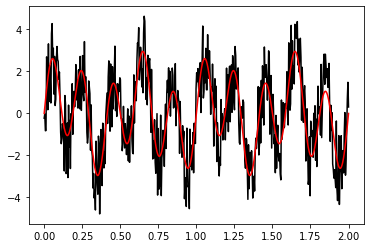

In [117]:
t_OS = np.linspace(0, T, 1000)
signal_OS = np.sin(4*np.pi*t_OS) + 2*np.sin(10*np.pi*t_OS) 

### BEGIN SOLUTION
signal_rebuild = DFT(t, FT, inverse=True)

plt.plot(t, signal_rebuild.real, color='k')
plt.plot(t_OS, signal_OS, color='r')
### END SOLUTION

However, in any realistic version of this case we don't _want_ to faithfully reconstruct the noise: we want the signal alone!  We can greatly reduce the noise by applying a __low-pass filter:__ since the signal occurs only at low frequencies and the noise occurs at all frequencies, just cutting off the higher frequencies will greatly reduce the noise without harming the signal.

In Fourier space, applying such a filter is easy: we just zero out all of the frequency modes above a cutoff.  __Create a mask__ for the Fourier transform of your noisy signal below which will remove all frequencies above 20 Hz.  (Note: you'll need to apply a factor of 2 to the amplitudes after masking to account for the presence of the mirror amplitudes at high frequency, which we have just been including silently up to this point.)  Then reconstruct once again and see how much better your result is compared to the true signal!

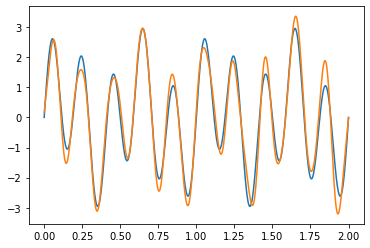

In [118]:
low_pass = np.ones_like(FT) * 2
low_pass[20:] = 0.0 

signal_rebuild = DFT(t, FT * low_pass, inverse=True)

plt.plot(t_OS, signal_OS)
plt.plot(t, signal_rebuild.real)

### Part E (optional)

Bonus challenge: here's a noisy step function, which is a more complicated signal - without the noise, the step function has power in an infinite number of frequency modes.  Try playing with different low-pass filters to see how well you can do at reconstructing the original step from your DFT of the noisy signal.

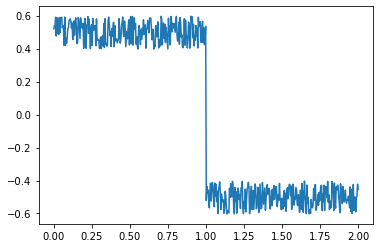

In [134]:
step_signal = 0.5-np.heaviside(t-1,1)
step_signal += 0.2*np.random.rand(*step_signal.shape)
step_signal -= np.mean(step_signal)

plt.plot(t, step_signal)

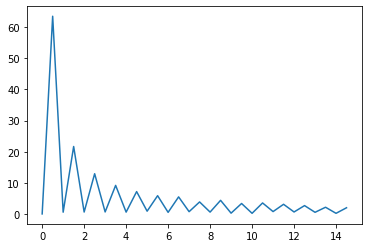

In [135]:
FT = DFT(t, step_signal)

pow_spec = np.abs(FT)
f = np.arange(0,500)/T

plt.plot(f[:30], pow_spec[:30])

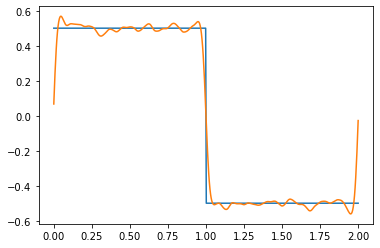

In [140]:
low_pass_smooth =   2* 1 / (1 + (f**2 / f[20]**2)**2)

signal_rebuild = DFT(t, FT * low_pass_smooth, inverse=True)
#signal_rebuild = DFT(t, FT, inverse=True)

step_exact = 0.5 - np.heaviside(t-1,1)

plt.plot(t, step_exact)
plt.plot(t, signal_rebuild.real)